**IMAGENET - VGG16 - NESNE TANIMA** <br>
![alt text](https://raw.githubusercontent.com/deeplearningturkiye/pratik-derin-ogrenme-uygulamalari/944a247d404741ba37b9ef74de0716acff6fd4f9/images/dltr_logo.png)

In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass

!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive
!ls

datalab  drive


In [0]:
!ls drive

ataturk-yolo-voc.cfg	      FEFKocaeli_2012_TanitimKatalogu.zip
Colab Notebooks		      FEF KOCAELI FULL.zip
DeepLearningAI		      movidius_
devnot_DL_sunum.ppt	      Resimler
DLTR_COLAB		      results
DLTR_Mask_RCNN		      _TEZ.rar
DLTR_YOLO		      TR_NLP
Emotion_Recognition_on_COLAB  VQA_Demo_my_version.zip


In [0]:
!pip3 install -q keras

**ImageNet projesi, görsel nesne tanıma yazılımı araştırmasında kullanılmak üzere tasarlanmış geniş bir görsel veritabanıdır. 
On milyondan fazla etiketli resim bulunmaktadır.**

**ImageNet veri setinde önceden eğitilmiş bir modeli göreceğiz. 16 katmanlı VGG Net (VGG16) modelini kullanacağız**


![alt text](https://github.com/hnarayanan/artistic-style-transfer/raw/05c95e5ac7001201d1ae9bf734a9224cf3445388/notebooks/images/imagenet-sample.jpg)



In [0]:
import numpy as np
from PIL import Image

from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions

Using TensorFlow backend.



**Keras'ta önceden eğitilmiş  bir modeli yükleme **

In [0]:
model = VGG16(weights='imagenet', include_top=True)

447045632/553467096 [=======================>......] - ETA: 8s

553467904/553467096 [==============================] - 41s 0us/step


ResourceExhaustedError: ignored

**Model yapısına bir göz atalım**

In [0]:
layers = dict([(layer.name, layer.output) for layer in model.layers])
layers

{'block1_conv1': <tf.Tensor 'block1_conv1/Relu:0' shape=(?, 224, 224, 64) dtype=float32>,
 'block1_conv2': <tf.Tensor 'block1_conv2/Relu:0' shape=(?, 224, 224, 64) dtype=float32>,
 'block1_pool': <tf.Tensor 'block1_pool/MaxPool:0' shape=(?, 112, 112, 64) dtype=float32>,
 'block2_conv1': <tf.Tensor 'block2_conv1/Relu:0' shape=(?, 112, 112, 128) dtype=float32>,
 'block2_conv2': <tf.Tensor 'block2_conv2/Relu:0' shape=(?, 112, 112, 128) dtype=float32>,
 'block2_pool': <tf.Tensor 'block2_pool/MaxPool:0' shape=(?, 56, 56, 128) dtype=float32>,
 'block3_conv1': <tf.Tensor 'block3_conv1/Relu:0' shape=(?, 56, 56, 256) dtype=float32>,
 'block3_conv2': <tf.Tensor 'block3_conv2/Relu:0' shape=(?, 56, 56, 256) dtype=float32>,
 'block3_conv3': <tf.Tensor 'block3_conv3/Relu:0' shape=(?, 56, 56, 256) dtype=float32>,
 'block3_pool': <tf.Tensor 'block3_pool/MaxPool:0' shape=(?, 28, 28, 256) dtype=float32>,
 'block4_conv1': <tf.Tensor 'block4_conv1/Relu:0' shape=(?, 28, 28, 512) dtype=float32>,
 'block4_co

**Toplam parametre sayısı da bize fikir verebilir**

In [0]:
model.count_params() # A lot!

138357544

In [0]:
!ls 'drive/DLTR_COLAB/NesneTanima/images/'

inek.jpg  kangal.jpg  van-kedisi.jpg


**Bir test resmi yükleyelim ve ön işlemler yapalım**

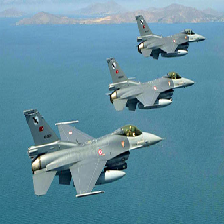

In [0]:
root = 'drive/NesneTanima/'
image_path = root + 'images/f16.jpg'
image = Image.open(image_path)
image = image.resize((224, 224))
image

In [0]:
# Convert it into an array
x = np.asarray(image, dtype='float32')
# Convert it into a list of arrays
x = np.expand_dims(x, axis=0)
# Pre-process the input to match the training data
x = preprocess_input(x)

**TEST RESMİ İLE SINIFLAMA YAPMA**

In [0]:
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])
print(decode_predictions(preds, top=1)[0][0][1])

Predicted: [('n04552348', 'warplane', 0.7603781), ('n02687172', 'aircraft_carrier', 0.22272106), ('n01494475', 'hammerhead', 0.004853822)]
warplane
